In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [20]:
X,y = make_classification(n_samples= 1000,n_features = 2 , n_classes = 2,n_clusters_per_class = 2,n_redundant=0 )

In [21]:
X

array([[ 0.71710695,  1.55990355],
       [ 1.14614177, -2.89703058],
       [ 0.90718859, -0.50460929],
       ...,
       [ 0.96906597, -1.02613914],
       [ 0.44268047, -1.17923136],
       [ 0.1366516 , -1.66113755]])

In [6]:
y

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

<Axes: xlabel='0', ylabel='1'>

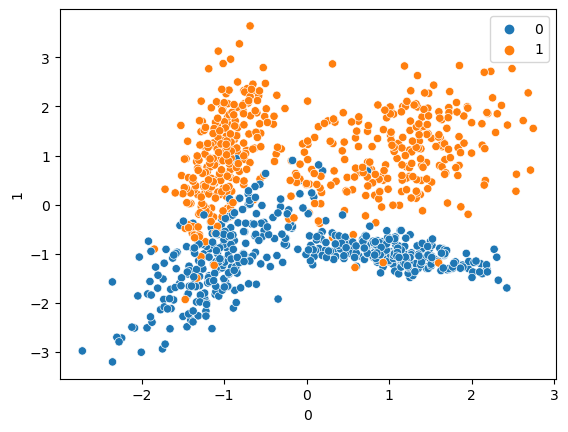

In [54]:
X,y = make_classification(n_samples= 1000,n_features = 2 , n_classes = 2,n_clusters_per_class = 2,n_redundant=0 )
sns.scatterplot(x = pd.DataFrame(X)[0] , y= pd.DataFrame(X)[1] , hue = y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
from sklearn.svm import SVC

In [28]:
svc = SVC(kernel='linear')

In [56]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
svc.coef_

array([[ 2.55420427, -0.87943719]])

In [57]:
y_pred = svc.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [83]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

0.924
0.924


In [84]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Accurecy Score is:',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       136
           1       0.91      0.92      0.92       114

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[126  10]
 [  9 105]]
Accurecy Score is: 0.924


## Hyperparameter tuning  

In [76]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','ploy','rbf','sigmoid']}

In [77]:
grid = GridSearchCV(SVC(),param_grid = param_grid,refit=True,cv = 5,verbose=3)

<IPython.core.display.Javascript object>

In [78]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 1/5] END .........C=0.1, gamma=1, kernel=ploy;, score=nan total time=   0.0s
[CV 2/5] END .........C=0.1, gamma=1, kernel=ploy;, score=nan total time=   0.0s
[CV 3/5] END .........C=0.1, gamma=1, kernel=ploy;, score=nan total time=   0.0s
[CV 4/5] END .........C=0.1, gamma=1, kernel=ploy;, score=nan total time=   0.0s
[CV 5/5] END .........C=0.1, gamma=1, kernel=ploy;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.847 total time=   0.0s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.840 total time=   0.0s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.753 total time=   0.0s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.807 total time=   0.0s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.767 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END .........C=1, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 2/5] END .........C=1, g

[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.727 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ........C=10, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 2/5] END ........C=10, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 3/5] END ........C=10, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 4/5] END ........C=10, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 5/5] END ........C=10, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .......C=10, ga

[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END .......C=100, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 2/5] END .......C=100, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 3/5] END .......C=100, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 4/5] END .......C=100, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 5/5] END .......C=100, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=100, ga

[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 2/5] END ......C=1000, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 3/5] END ......C=1000, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 4/5] END ......C=1000, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 5/5] END ......C=1000, gamma=0.1, kernel=ploy;, score=nan total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/5] END .C=1000, gamma=

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\lib\site-packages\sk

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'ploy', 'rbf', 'sigmoid']},
             verbose=3)

In [79]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [80]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Accurecy Score is:',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       136
           1       0.91      0.92      0.92       114

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[126  10]
 [  9 105]]
Accurecy Score is: 0.924
